In [ ]:
!pip install roboflow
!pip install ultralytics==8.2.103 -q
from IPython import display
display.clear_output()
!yolo settings sync=False
import ultralytics
ultralytics.checks()
from roboflow import Roboflow
from ultralytics import YOLO
from IPython.display import display, Image

Ultralytics YOLOv8.2.103 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (NVIDIA L4, 22693MiB)
Setup complete ✅ (12 CPUs, 53.0 GB RAM, 39.6/235.7 GB disk)


In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="CAbonsWqwGHB6kwse88u")
project = rf.workspace("adid").project("hand-segmentation-dne96-b4lqp")
version = project.version(1)
dataset = version.download("yolov8")



loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Hand-segmentation-1 in yolov8:: 100%|██████████| 52084/52084 [00:07<00:00, 6915.47it/s]


In [ ]:
%cd {HOME}

!yolo task=segment mode=train model=yolov8s-seg.pt data={dataset.location}/data.yaml epochs=75 imgsz=640 patience=30 batch=64

/content
100% 22.8M/22.8M [00:01<00:00, 23.8MB/s]
New https://pypi.org/project/ultralytics/8.3.223 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (NVIDIA L4, 22693MiB)
engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=/content/Hand-segmentation-1/data.yaml, epochs=75, time=None, patience=30, batch=64, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=Fal

/content


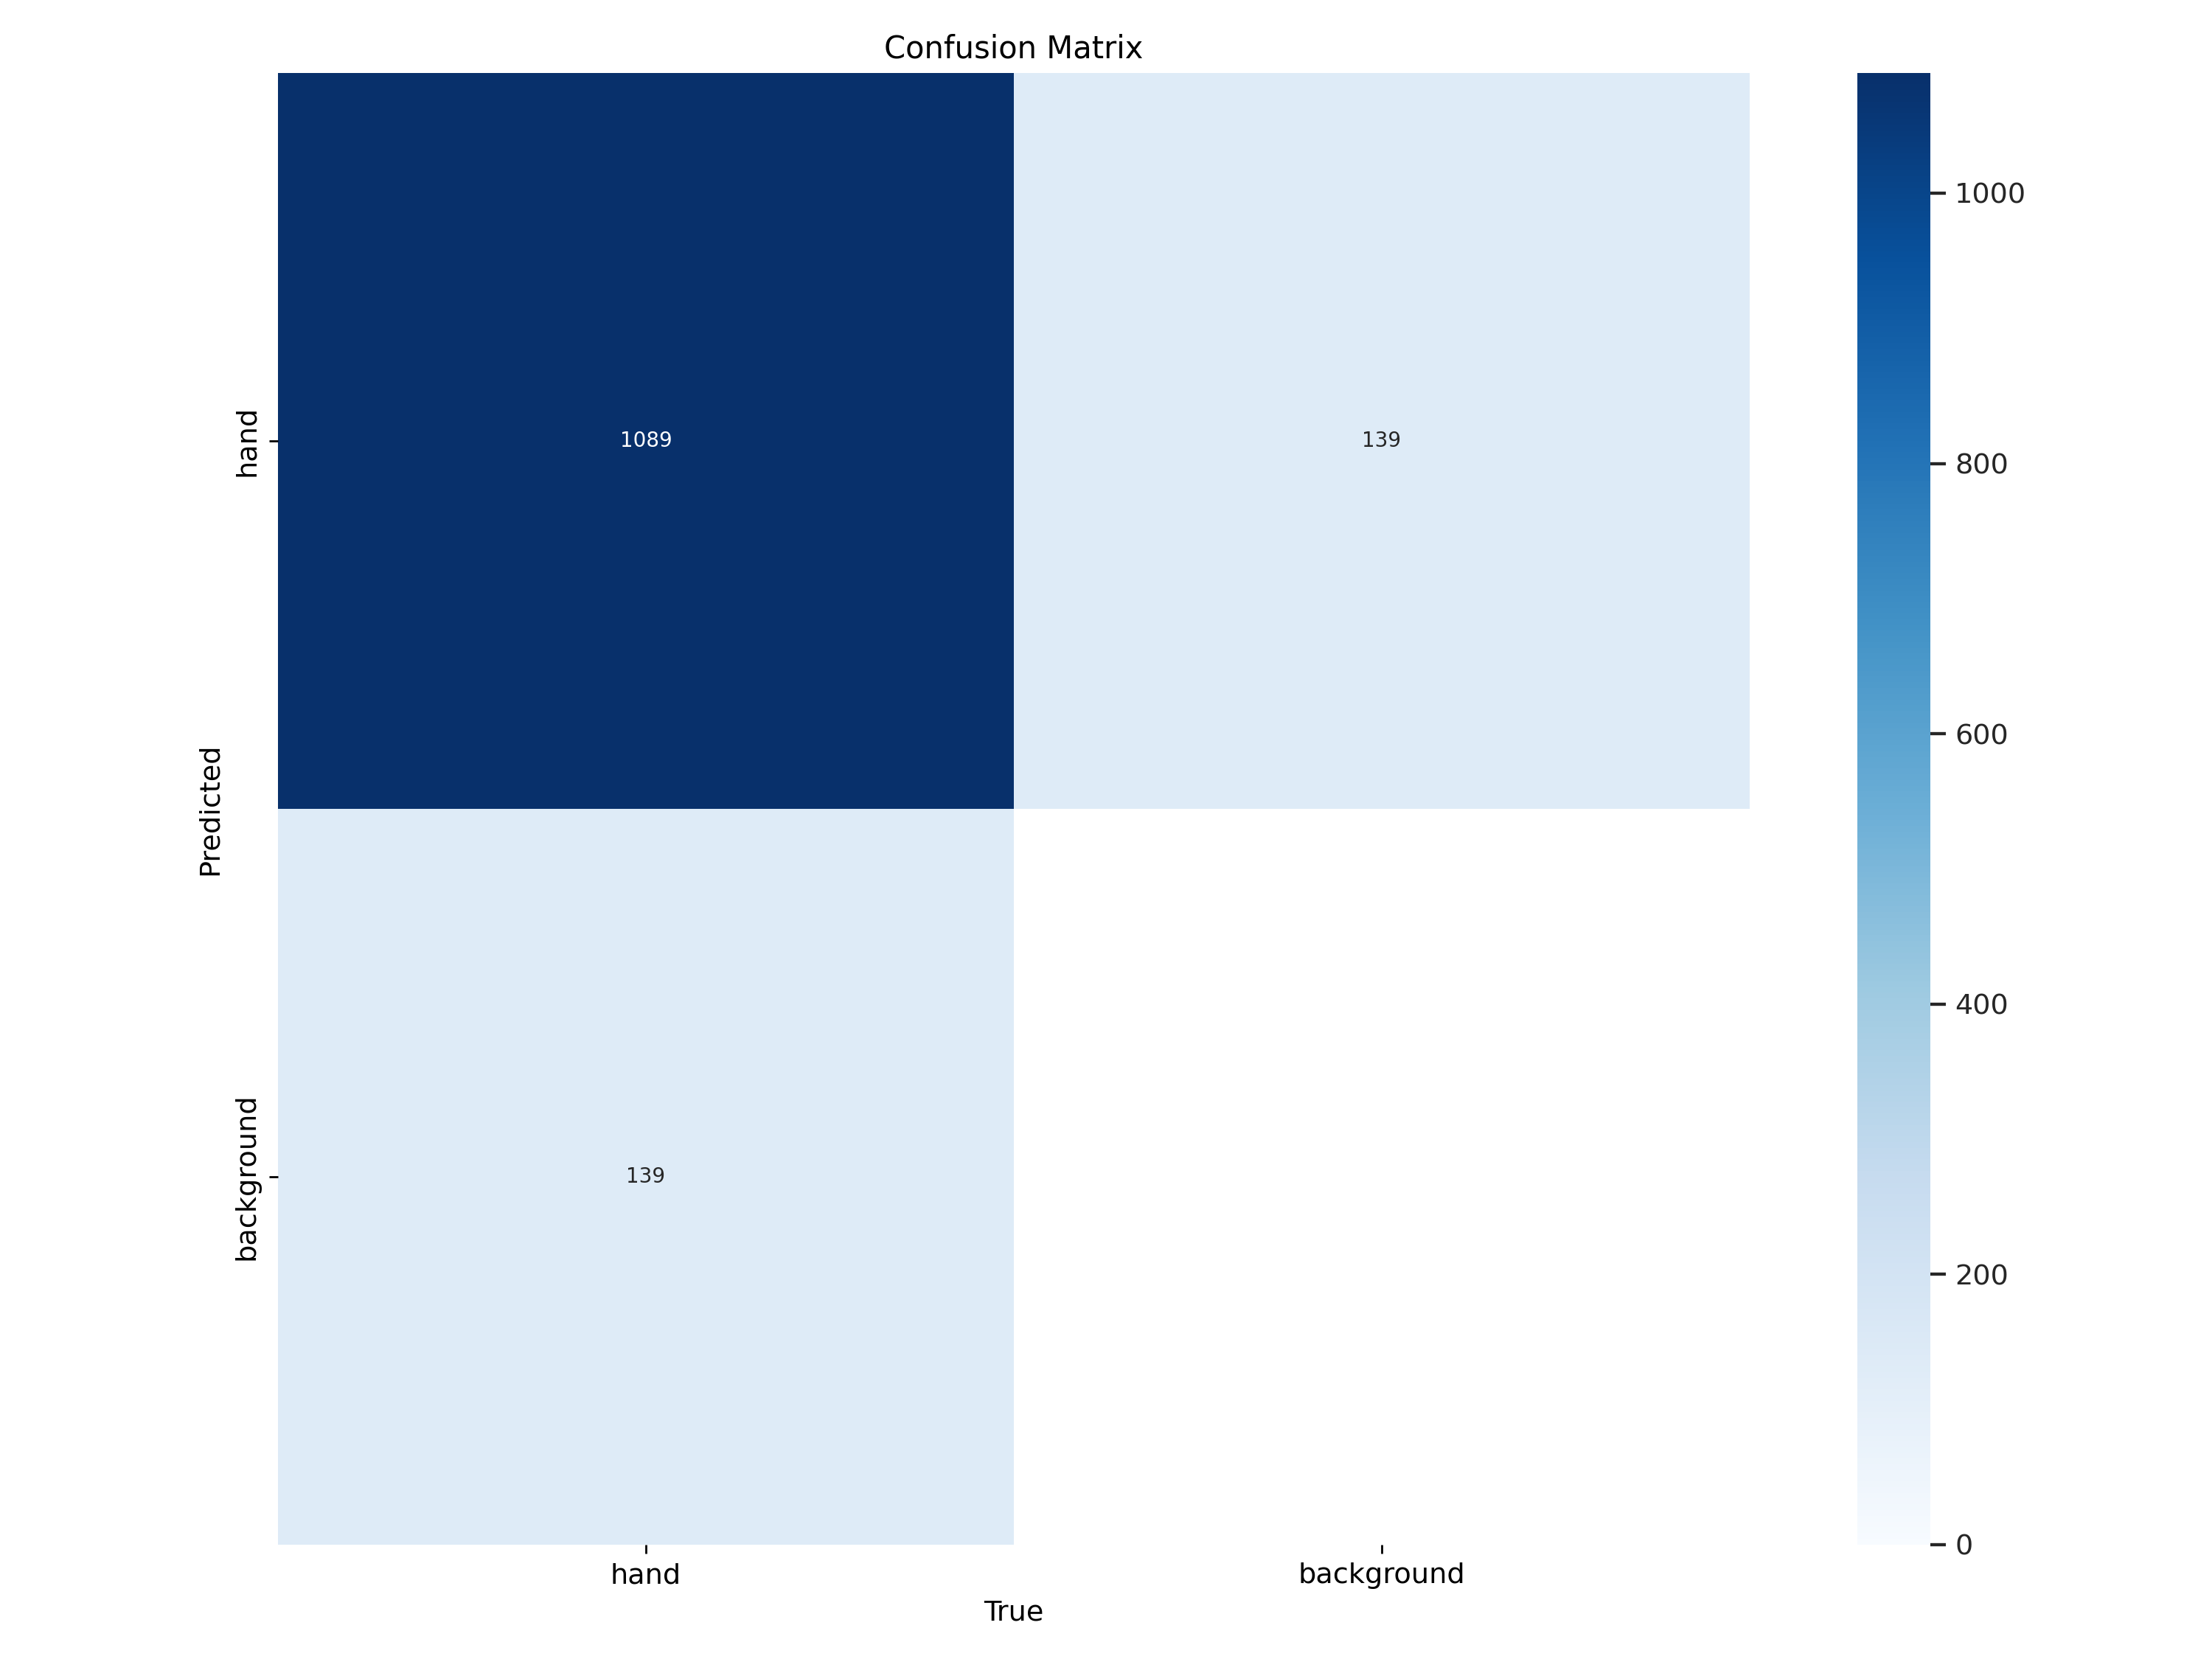

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/confusion_matrix.png', width=640)

/content


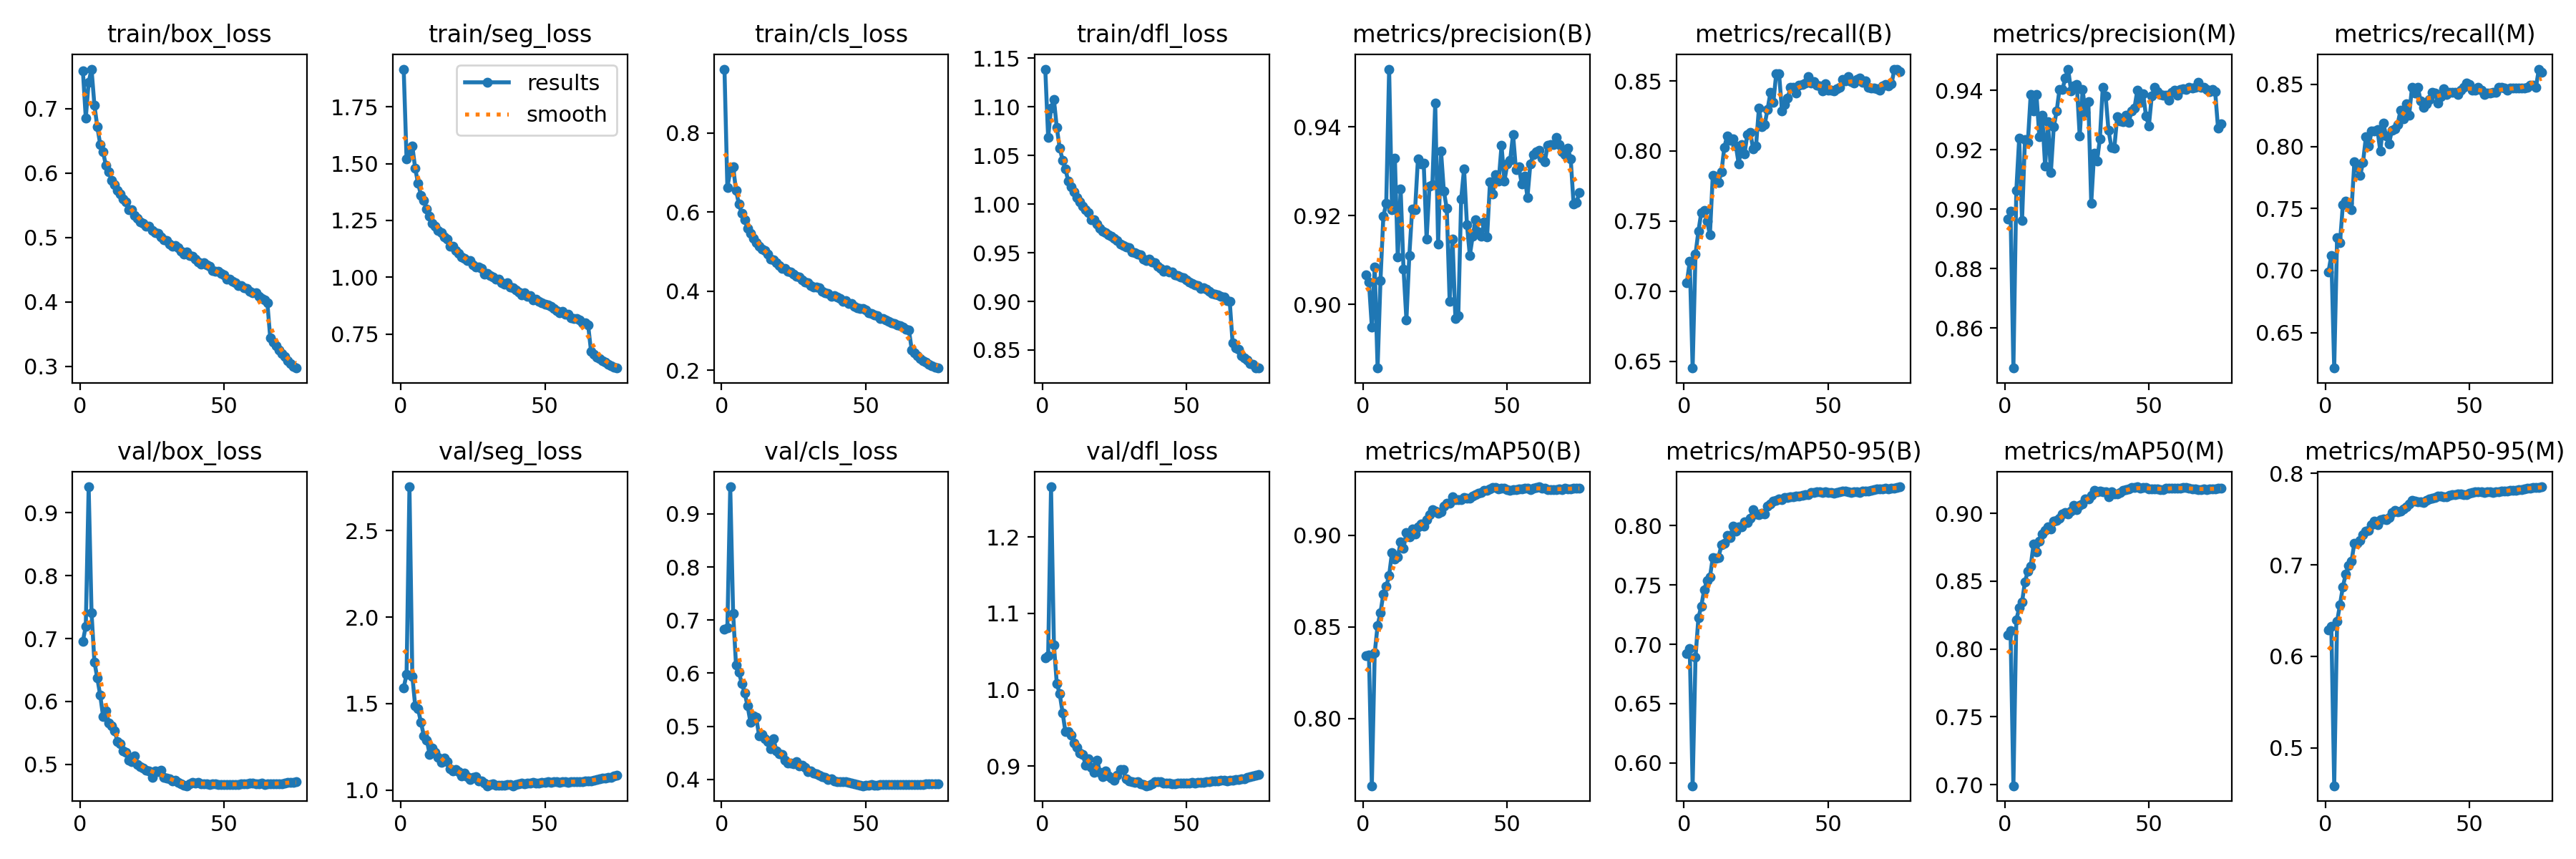

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/results.png', width=640)

/content


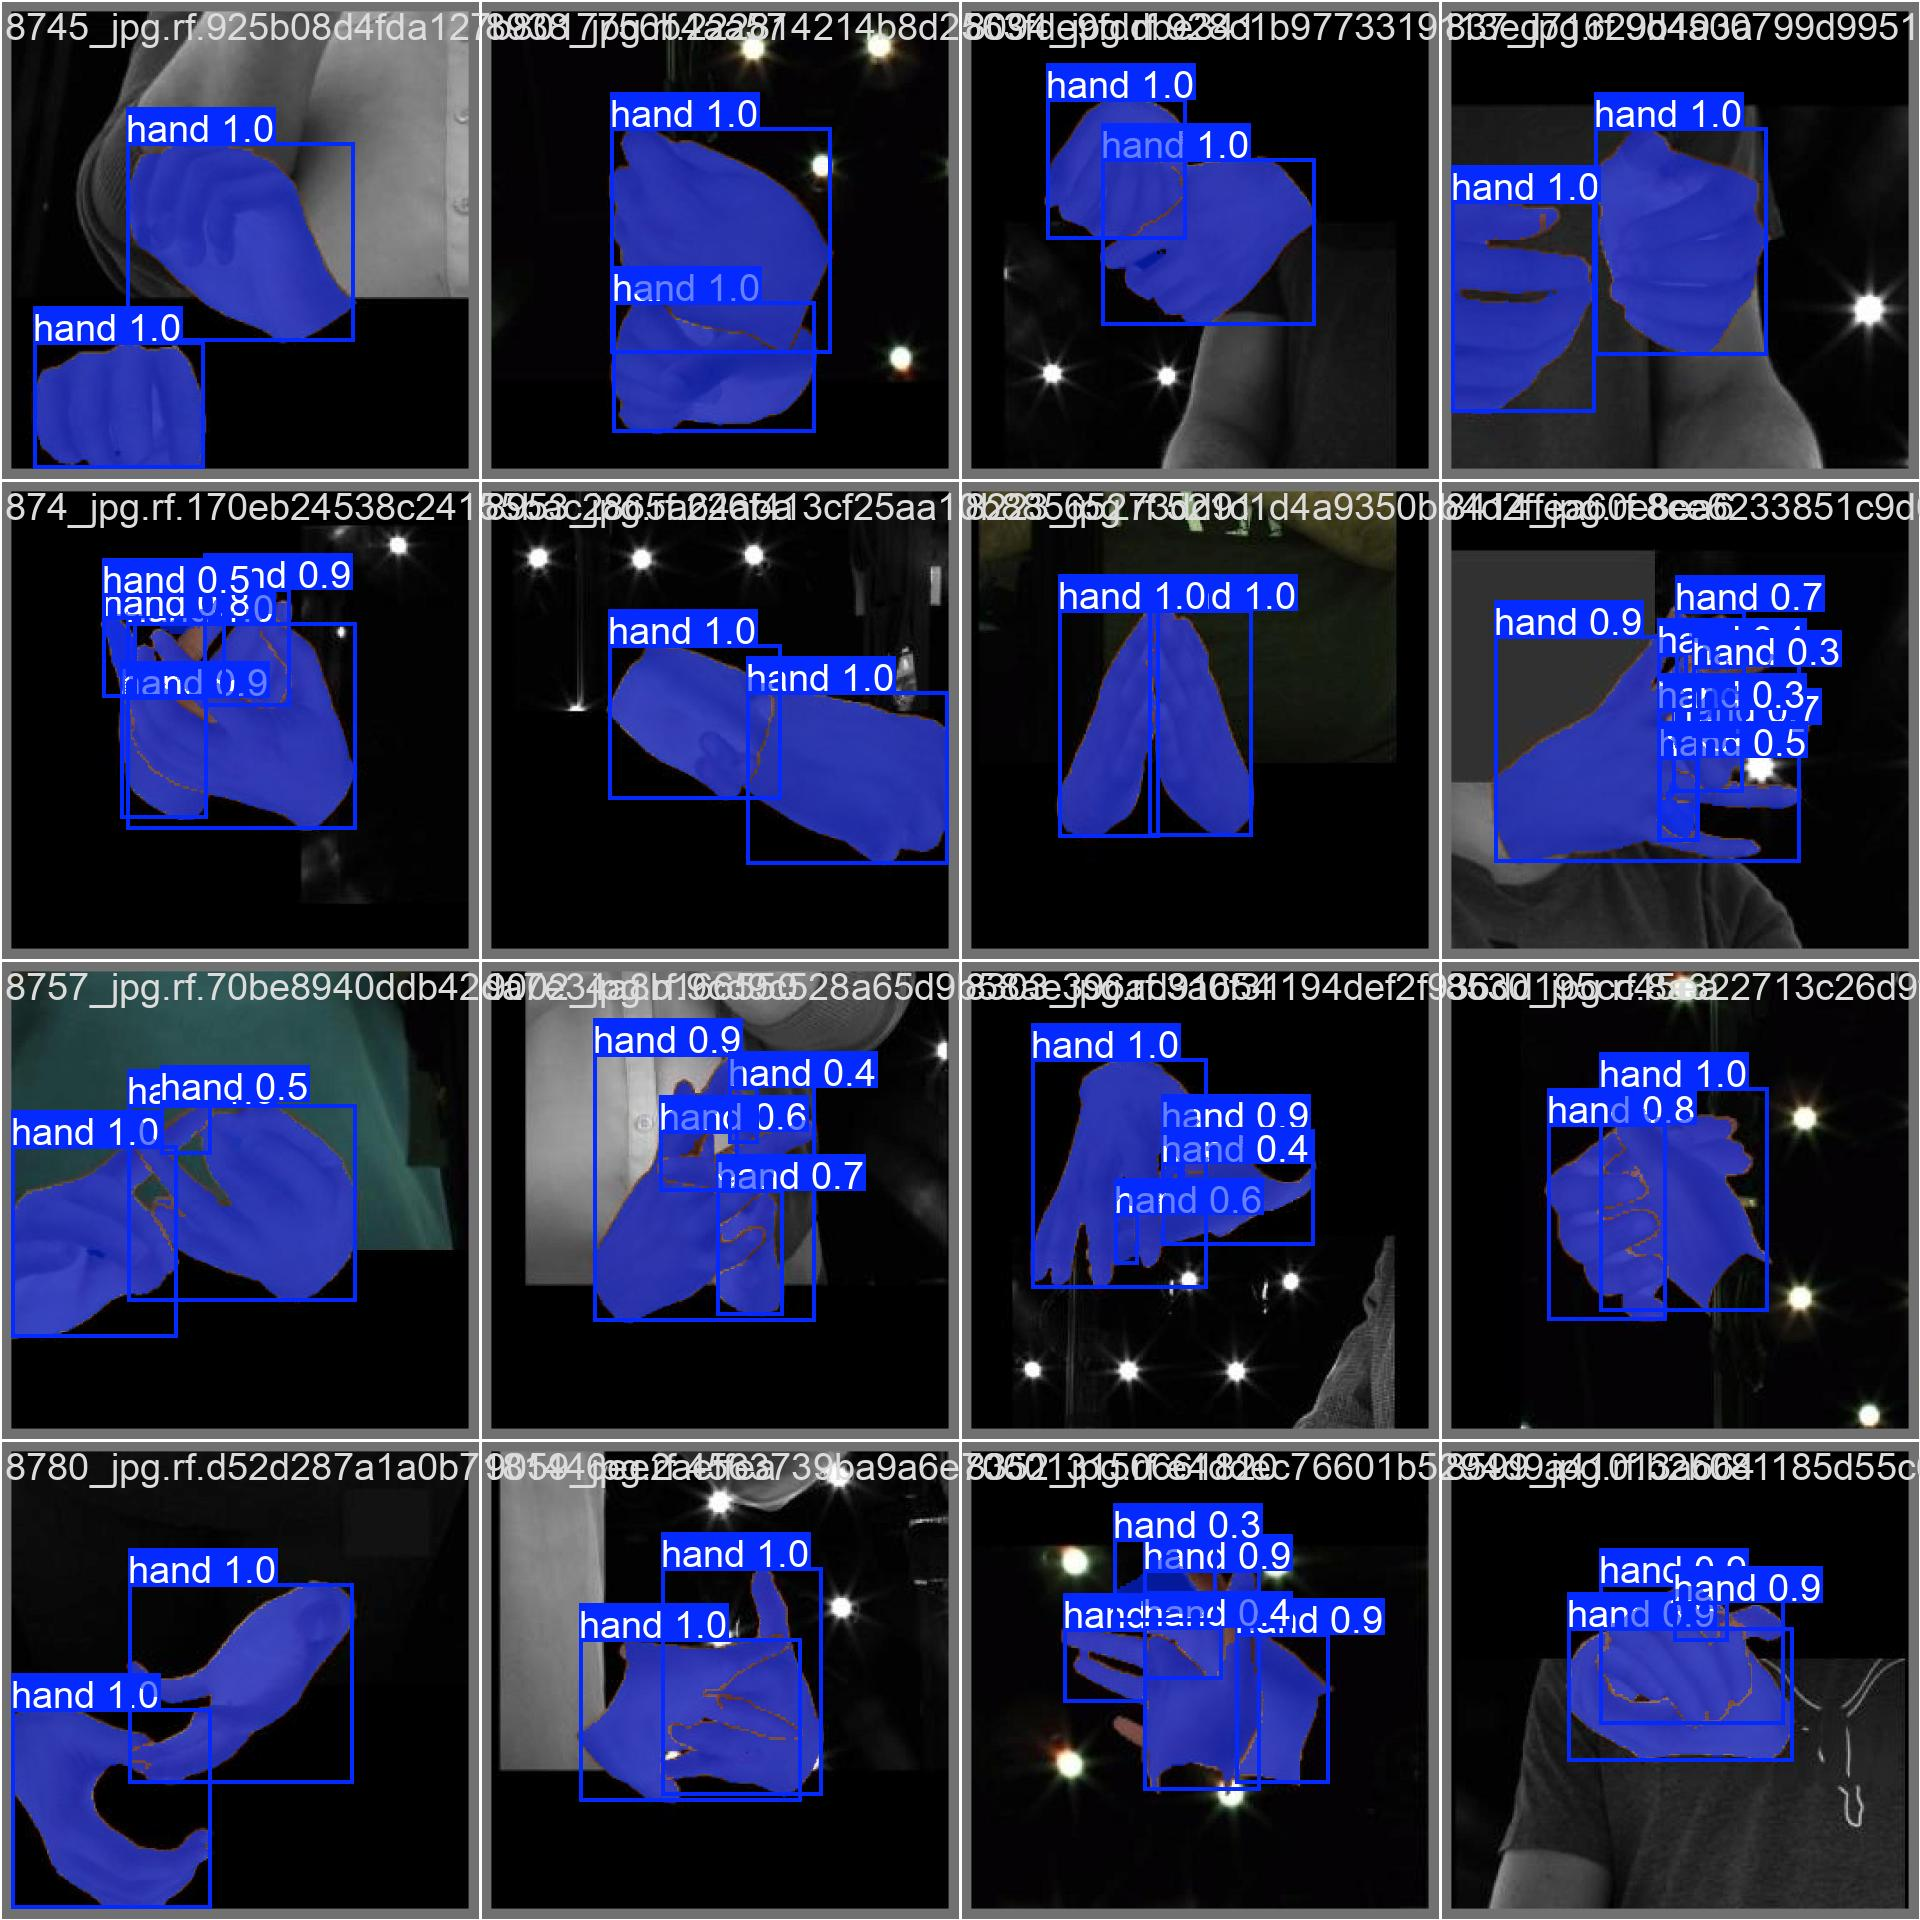

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/val_batch0_pred.jpg', width=640)

In [ ]:
%cd {HOME}

!yolo task=segment mode=val model={HOME}/runs/segment/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (NVIDIA L4, 22693MiB)
YOLOv8s-seg summary (fused): 195 layers, 11,779,987 parameters, 0 gradients, 39.9 GFLOPs
val: Scanning /content/Hand-segmentation-1/valid/labels.cache... 463 images, 0 backgrounds, 0 corrupt: 100% 463/463 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 29/29 [00:06<00:00,  4.66it/s]
                   all        463       1228      0.925      0.857      0.926      0.833       0.93       0.86      0.919      0.785
Speed: 0.6ms preprocess, 5.5ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/segment/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/runs/segment/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=true

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict/*.jpg')[:3]:
      display(Image(filename=image_path, height=640))
      print("\n")

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8-seg", model_path=f"{HOME}/runs/segment/train/")

Dependency ultralytics==8.0.196 is required but found version=8.2.103, to fix: `pip install ultralytics==8.0.196`
View the status of your deployment at: https://app.roboflow.com/adid/hand-segmentation-dne96-b4lqp/1
Share your model with the world at: https://universe.roboflow.com/adid/hand-segmentation-dne96-b4lqp/model/1
